# Comparing Preference Alignment Techniques:
<h3>
1. Direct Preference Optimisation (DPO)<br>
2. Odds Ratio Preference Optimization (ORPO)
<h3/>

## Introduction

The alignment of Large Language Model (LLM) outputs with human expectations, encompassing attributes such as conversational fluency and safety, has led to the widespread adoption of Reinforcement Learning from Human Feedback (RLHF) as the de facto final training stage for models like GPT-4 and Claude.  However, this methodology imports the inherent complexities of Reinforcement Learning (RL) into Natural Language Processing (NLP).  The process requires careful design of a suitable reward function, training the model to accurately estimate state values, and, crucially, managing the training trajectory to prevent excessive divergence from the pre-trained model, thereby avoiding the generation of nonsensical text rather than coherent language.  Consequently, RLHF is a complex undertaking, involving multiple interacting elements, and presents significant challenges in ensuring successful implementation.

Unit Three of the BlueDot Impact AI Alignment course provides an in-depth examination of the Reinforcement Learning from Human Feedback (RLHF) technique.  Through a combination of research papers and structured discussion, the module facilitates the evaluation, critique, and objective analysis of RLHF.

This engagement fostered a strong interest in the practical application of RLHF, prompting me to undertake the RLHF short course offered by [deeplearning.ai](https://learn.deeplearning.ai/courses/reinforcement-learning-from-human-feedback/lesson/1/introduction) concurrently with my BlueDot studies.

The practical implementation of RLHF is computationally demanding, even when utilising cloud-based platforms.  The following image illustrates the termination of an RLHF experiment on Google Cloud Platform's (GCP) Vertex AI due to a RESOURCE_EXHAUSTED error, notwithstanding the availability of $237 in free cloud credits on the account.

<img src="https://drive.google.com/uc?id=1reL8ZhPJ-mWIJtEuAY4LlPZM8RqA01zs" alt="failed GCP DAG" width="800" height="400" style="display: block; margin-left: auto; margin-right: auto;"><br>
<b>Image 1<b/>

## DPO:

Despite the above setback, I remained highly motivated by my weekly learnings and discussions at the BlueDot impact course, and began exploring opensource options. Luckily, I stumbled upon the Huggingface platform and its myriad of models and tools, such as the Transformer Reinforcement Learning (TRL) toolkit. Inquickly became acquainted with the Huggingface SMOlLM2 models. These are small language models portable enough to run on a local device or in a colab notebook, yet powerful and comparable.

In no time, I started learning about comparable human-preference alignment techniques: `Direct Preference Optimisation` (DPO)and the `Odds Ratio Preference Optimization` (ORPO) methods.

In the paper _Direct Preference Optimisation: Your Language Model is secretly a Reward Model_ by researchers at [Stanford University](https://arxiv.org/pdf/2305.18290), Direct Preference Optimization (DPO) is introdued as a new method for aligning language models with human preferences.  It is a simpler and more stable alternative to Reinforcement Learning from Human Feedback (RLHF).  DPO works by directly optimizing the language model to maximize the probability of preferred responses and minimize the probability of dispreferred responses.  This is done without the need for a separate reward model or reinforcement learning.  DPO has been shown to be as effective as RLHF in a variety of tasks, including sentiment control, summarization, and dialogue.  It is also more computationally efficient than RLHF, making it a promising approach for training large language models

<img src="https://drive.google.com/uc?id=19BqooG4wd4harlKv9ZuPWkhDbALoP4jP" alt="Comparing RLHF with DPO" width="800" height="300" style="display: block; margin-left:auto; margin-right: auto;"><br>
<b>Image 2<b/>
<br>
<br>
**Direct Preference Optimization (DPO): A Concise Overview**

The above image compares the RLHF and DPO methodologies. DPO simplifies RLHF, it begins with supervised fine-tuning (SFT), adapting the model to the target domain using instruction-following data.

 This allows the model to learn basic task completion.  Next, preference learning refines the model using pairs of outputs, one preferred and one not.  These pairs help align the model with human preferences.  DPO's key innovation is direct optimization.  Instead of training a separate reward model, it uses binary cross-entropy loss to update model weights based on preference data.  This improves stability and efficiency compared to RLHF methods.





## The Case for Small Language Models (SLMs) in Domain-Specific Applications

The most exciting aspect for me was Huggingface's ability to serve these techniques via lightweight, Language Models, such as the __[SmolLM2](https://github.com/huggingface/smollm/tree/main)__ series of models.

**So Why Small Language Models (SLMs)?**

Despite the remarkable capabilities of LLMs, their substantial computational demands and potential redundancy in specialized contexts underscore the advantages of SLMs for domain-specific tasks:

* Efficiency: SLMs minimize computational resource usage during training and deployment.
* Customization: Fine-tuning SLMs for specific domains is easier.
* Control: SLMs enhance understanding and control over model behaviour.
* Economy: SLMs reduce operational costs.
* Privacy: SLMs enable local operation, safeguarding data privacy.
* Sustainability: SLMs promote resource efficiency and reduce carbon footprint.
* Research Accessibility: SLMs facilitate academic research by simplifying LLM utilization.

The aforementioned advantages of SLMs, particularly their accessibility for rapid prototyping and experimentation, are extremely important. As an academic at the University of Wolverhampton, the capacity to efficiently utilize SLMs offers considerable potential for enhancing teaching and learning through hands-on experimentation, particularly in resource-constrained environments.I plan to establish an AI safety club, which further underscores the pedagogical merits of SLMs, enabling students to gain practical experience with cutting-edge LLM research and development, even with limitations like a single GPU or laptop


# ORPO:

### A Unified Approach to LLM Fine-Tuning

In the paper _ORPO: Monolithic Preference Optimization without Reference Model_, researchers at [KAIST AI](https://arxiv.org/pdf/2403.07691) present ORPO: A novel fine-tuning technique that unifies fine-tuning and preference alignment

In practice, ORPO penalises disfavoured generation styles during training.  ORPO has two components: a _supervised fine-tuning loss_ and a _relative ratio loss_.  The supervised fine-tuning loss adapts the model to the desired domain, while the relative ratio loss differentiates between favoured and disfavoured responses.  ORPO does not require a reference model, making it computationally more efficient than other methods.

 While conventional approaches involve separate stages for adapting the model to a domain and aligning it with human preferences, ORPO integrates these steps, into a single process, potentially improving efficiency and performance compared to traditional methods like RLHF and DPO.

 <img src="https://drive.google.com/uc?id=1f-N2UWdjrTAKJmhtxE-Y1PPehkpc6p3w" alt="Comparing RLHF with DPO" width="1000" height="300" style="display: block; margin-left:auto; margin-right: auto;">
 <b>Image 3<b/>


## Existing Work:

As observed in the [Argilla Blog](https://argilla.io/blog/mantisnlp-rlhf-part-8/), When comparing the win rate and reward distribution of ORPO with those of SFT, PPO, and DPO, an increase was observed across all model sizes in both data sets. In the first case, ORPO was preferred over SFT and PPO, reaching a maximum win rate of 85%; while the win rate of DPO showed a proportional increase with model size. Moreover, upon examining lexical diversity, it became apparent that ORPO tended to assign higher probabilities to desirable tokens and to generate more specific responses.

Also, some key differences in techniques can be observed from `Image 3` above:
Key Differences and Advantages:


*   DPO vs. RLHF: DPO simplifies the training process and improves stability by eliminating the RL step. Yet it keeps the SFT step (Ref model).
*   ORPO vs. DPO: ORPO enhances the adaptation to human preferences by focusing on the relative odds of preferred response. It avoids the SFT step, Instead, it directly updates the model parameters using a combination of supervised fine-tuning loss and a relative ratio loss.

<img src="https://drive.google.com/uc?id=1LuvakaxG2VJIsigfCgB-hxbSx540MFkh" alt="Comparing RLHF with DPO" width="1000" height="400" style="display: block; margin-left:auto; margin-right: auto;">
 <b>Image 4, <a href="https://arxiv.org/html/2403.07691v2">Source</a><b/>




## My Project Focus:

This project investigates the efficacy of Direct Preference Optimization (DPO) and Odds Ratio Preference Optimization (ORPO) as alternative approaches to Reinforcement Learning from Human Feedback (RLHF) for aligning language models with human preferences. The project will utilize the `Huggingface trl-lib/ultrafeedback_binarized-Train` dataset to align the `HuggingFaceTB/SmolLM2-135M` language model to human preferences using both **DPO** and **ORPO**, and subsequently evaluate their performance on the `Huggingface trl-lib/ultrafeedback_binarized-Test` dataset.

### Evaluation Metrics:

The following evaluation metrics will be used to compare the performance of DPO and ORPO:

**Win Rate:** The percentage of instances where the model's output is preferred by human evaluators over a baseline response. This metric directly assesses the model's ability to generate responses aligned with human preferences.

**KL Divergence:** This metric measures the difference between the distribution of the model's output and a reference distribution, typically the initial fine-tuned model. It helps to assess the degree to which the model has deviated from the original model during preference learning.

### Visualization and Analysis:

Weights and Biases (Wandb) will be used to visualize and compare the training and testing logs of both DPO and ORPO. This will provide insights into the learning dynamics of each technique and facilitate a comparative analysis of their performance.

### Aim:

This project aims to contribute to a better understanding of DPO and ORPO as alternative preference alignment techniques. By simplifying the process and potentially improving efficiency compared to RLHF, these techniques can facilitate wider adoption and experimentation with preference learning in language models. The findings of this project will be disseminated to the wider academic community to promote knowledge sharing and further research in this area.

## Step 1: Supervised Fine Tuning for DPO technique.

The next few cells demonstrate how to fine-tune the `HuggingFaceTB/SmolLM2-135M` model using the `SFTTrainer` function from the [Transformer Reinforcement Learning](https://huggingface.co/docs/trl/en/index) (trl) library.

In [1]:
# Install the requirements in Google Colab
!pip install --q transformers datasets trl huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.9/313.9 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# Authenticate to Hugging Face

from huggingface_hub import login
login()

# for convenience you can create an environment variable containing your hub token as HF_TOKEN

In [3]:
# Import necessary libraries
from transformers import AutoModelForCausalLM, AutoTokenizer
from datasets import load_dataset
from trl import SFTConfig, SFTTrainer, setup_chat_format
import torch

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps" if torch.backends.mps.is_available() else "cpu"
)
print(device)

cuda


In [4]:
# mount colab
from google.colab import userdata
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Next authenticate colab environment
import sys
if 'google.colab' in sys.modules:
  from google.colab import auth
  auth.authenticate_user()

In [6]:
# Load the model and tokenizer
model_name = "HuggingFaceTB/SmolLM2-135M"
model = AutoModelForCausalLM.from_pretrained(
    pretrained_model_name_or_path=model_name
).to(device)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_name)

config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/269M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.66k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/831 [00:00<?, ?B/s]

In [7]:
# Set up the chat format
model, tokenizer = setup_chat_format(model=model, tokenizer=tokenizer)

In [8]:
# Set our name for the finetune model to be saved &/ uploaded to
finetune_name = "SmolLM2-SFT-Model"
finetune_tags = ["SFT", "for-DPO"]

In [9]:
# Let's see the model structure
model

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(49152, 576)
    (layers): ModuleList(
      (0-29): 30 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=576, out_features=576, bias=False)
          (k_proj): Linear(in_features=576, out_features=192, bias=False)
          (v_proj): Linear(in_features=576, out_features=192, bias=False)
          (o_proj): Linear(in_features=576, out_features=576, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=576, out_features=1536, bias=False)
          (up_proj): Linear(in_features=576, out_features=1536, bias=False)
          (down_proj): Linear(in_features=1536, out_features=576, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((576,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((576,), eps=1e-05)
      )
    )
    (norm): LlamaRMSNorm

**Generate with the base model**

Here we will try out the base model which does not have a chat template to generate some response to a question.

In [10]:
from pprint import pprint

# Let's test the base model before training
prompt = "Write an ovation for Alan Turing the Godfather of AI"

# Format with template
messages = [{"role": "user", "content": prompt}]
formatted_prompt = tokenizer.apply_chat_template(messages, tokenize=False)

# Generate response
inputs = tokenizer(formatted_prompt, return_tensors="pt").to(device)
outputs = model.generate(**inputs, max_new_tokens=100)
print("Before training:")
pprint(tokenizer.decode(outputs[0], skip_special_tokens=True))

Before training:
('user\n'
 'Write an ovation for Alan Turing the Godfather of AI\n'
 'Write an ovation for Alan Turing the Godfather of AI\n'
 '\n'
 'The Turing Award is a prestigious award given to the most outstanding and '
 'distinguished person in the field of artificial intelligence. The award is '
 'given annually to the person who has made the most significant contribution '
 'to the field of artificial intelligence. The award is given to the person '
 'who has made the most significant contribution to the field of artificial '
 'intelligence. The award is given to the person who has made the most '
 'significant contribution to the field of artificial intelligence.')


In [11]:
prompt2 = 'Write a haiku about programming'

# Format with template
messages = [{"role": "user", "content": prompt2}]
formatted_prompt = tokenizer.apply_chat_template(messages, tokenize=False)

# Generate response
inputs = tokenizer(formatted_prompt, return_tensors="pt").to(device)
outputs = model.generate(**inputs, max_new_tokens=100)
print("Before training:")
pprint(tokenizer.decode(outputs[0], skip_special_tokens=True))

Before training:
('user\n'
 'Write a haiku about programming\n'
 'Write a haiku about programming\n'
 'Write a haiku about programming\n'
 'Write a haiku about programming\n'
 'Write a haiku about programming\n'
 'Write a haiku about programming\n'
 'Write a haiku about programming\n'
 'Write a haiku about programming\n'
 'Write a haiku about programming\n'
 'Write a haiku about programming\n'
 'Write a haiku about programming\n'
 'Write a haiku about programming\n'
 'Write a haiku about programming\n'
 'Write a haiku about programming\n'
 'Write a haiku about programming\n'
 'Write a')


### Dataset Preparation

I will load a sample dataset and format it for training. The dataset should be structured with input-output pairs, where each input is a prompt and the output is the expected response from the model.

**TRL will format input messages based on the model's chat templates.** They need to be represented as a list of dictionaries with the keys: `role` and `content`,.

In [12]:
# Load a sample dataset
from datasets import load_dataset

# Using the smoltalk dataset, focused on everyday-conversations
ds = load_dataset(path="HuggingFaceTB/smoltalk", name="everyday-conversations")

README.md:   0%|          | 0.00/9.25k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/946k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/52.6k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2260 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/119 [00:00<?, ? examples/s]

In [13]:
# what keys exist in the dataset
ds.keys()

dict_keys(['train', 'test'])

Let's see corresponding topics and conversations from the training dataset

In [14]:
for i in range(3):
  print('TOPIC: ',ds['train']['full_topic'][i])
  print()
  pprint(ds['train']['messages'][i])
  print('-'*100)
  print()

TOPIC:  Travel/Vacation destinations/Beach resorts

[{'content': 'Hi there', 'role': 'user'},
 {'content': 'Hello! How can I help you today?', 'role': 'assistant'},
 {'content': "I'm looking for a beach resort for my next vacation. Can you "
             'recommend some popular ones?',
  'role': 'user'},
 {'content': 'Some popular beach resorts include Maui in Hawaii, the Maldives, '
             "and the Bahamas. They're known for their beautiful beaches and "
             'crystal-clear waters.',
  'role': 'assistant'},
 {'content': 'That sounds great. Are there any resorts in the Caribbean that '
             'are good for families?',
  'role': 'user'},
 {'content': 'Yes, the Turks and Caicos Islands and Barbados are excellent '
             'choices for family-friendly resorts in the Caribbean. They offer '
             'a range of activities and amenities suitable for all ages.',
  'role': 'assistant'},
 {'content': "Okay, I'll look into those. Thanks for the recommendations!",
  

### Configuring the SFTTrainer

The `SFTTrainer` is configured with various parameters that control the training process. These include the number of training steps, batch size, learning rate, and evaluation strategy. These parameters can be adjusted based on specific requirements and computational resources.

In [15]:
# Configure the SFTTrainer
sft_config = SFTConfig(
    output_dir="/content/drive/MyDrive/BluedotProjectWork/sft_output", # path to dir
    max_steps=1000,  # Adjust based on dataset size and desired training duration
    per_device_train_batch_size=4,  # Set according to your GPU memory capacity
    learning_rate=5e-5,  # Common starting point for fine-tuning
    logging_steps=10,  # Frequency of logging training metrics
    save_steps=100,  # Frequency of saving model checkpoints
    evaluation_strategy="steps",  # Evaluate the model at regular intervals
    eval_steps=50,  # Frequency of evaluation
    use_mps_device=(
        True if device == "mps" else False
    ),  # Use MPS for mixed precision training
    hub_model_id=finetune_name,  # Set a unique name for your model
)

# Initialize the SFTTrainer
trainer = SFTTrainer(
    model=model,
    args=sft_config,
    train_dataset=ds["train"],
    tokenizer=tokenizer,
    eval_dataset=ds["test"],
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-15-e3aa43ad590a>:18: FutureWarning: `tokenizer` is deprecated and removed starting from version 0.16.0 for `SFTTrainer.__init__`. Use `processing_class` instead.
  trainer = SFTTrainer(


Map:   0%|          | 0/2260 [00:00<?, ? examples/s]

Map:   0%|          | 0/119 [00:00<?, ? examples/s]

### Training the Model

With the trainer configured, I can now proceed to train the model. The training process will involve iterating over the dataset, computing the loss, and updating the model's parameters to minimize this loss.

In [16]:
# Train the model

if True:
  trainer.train()

  # Save the model
  trainer.save_model(f"/content/drive/MyDrive/BluedotProjectWork/FTmodels/{finetune_name}")

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: lawrence_k (lawrence_k-the-university-of-wolverhampton) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Step,Training Loss,Validation Loss
50,1.065700,1.158980
100,1.111600,1.124065
150,1.062400,1.095483
200,1.048200,1.079700
250,1.041200,1.070457
300,1.029200,1.061474
350,1.003400,1.054751
400,1.006500,1.050794
450,1.021100,1.042637
500,1.076300,1.033727


**Visualizaing training/eval loss on SFT task**

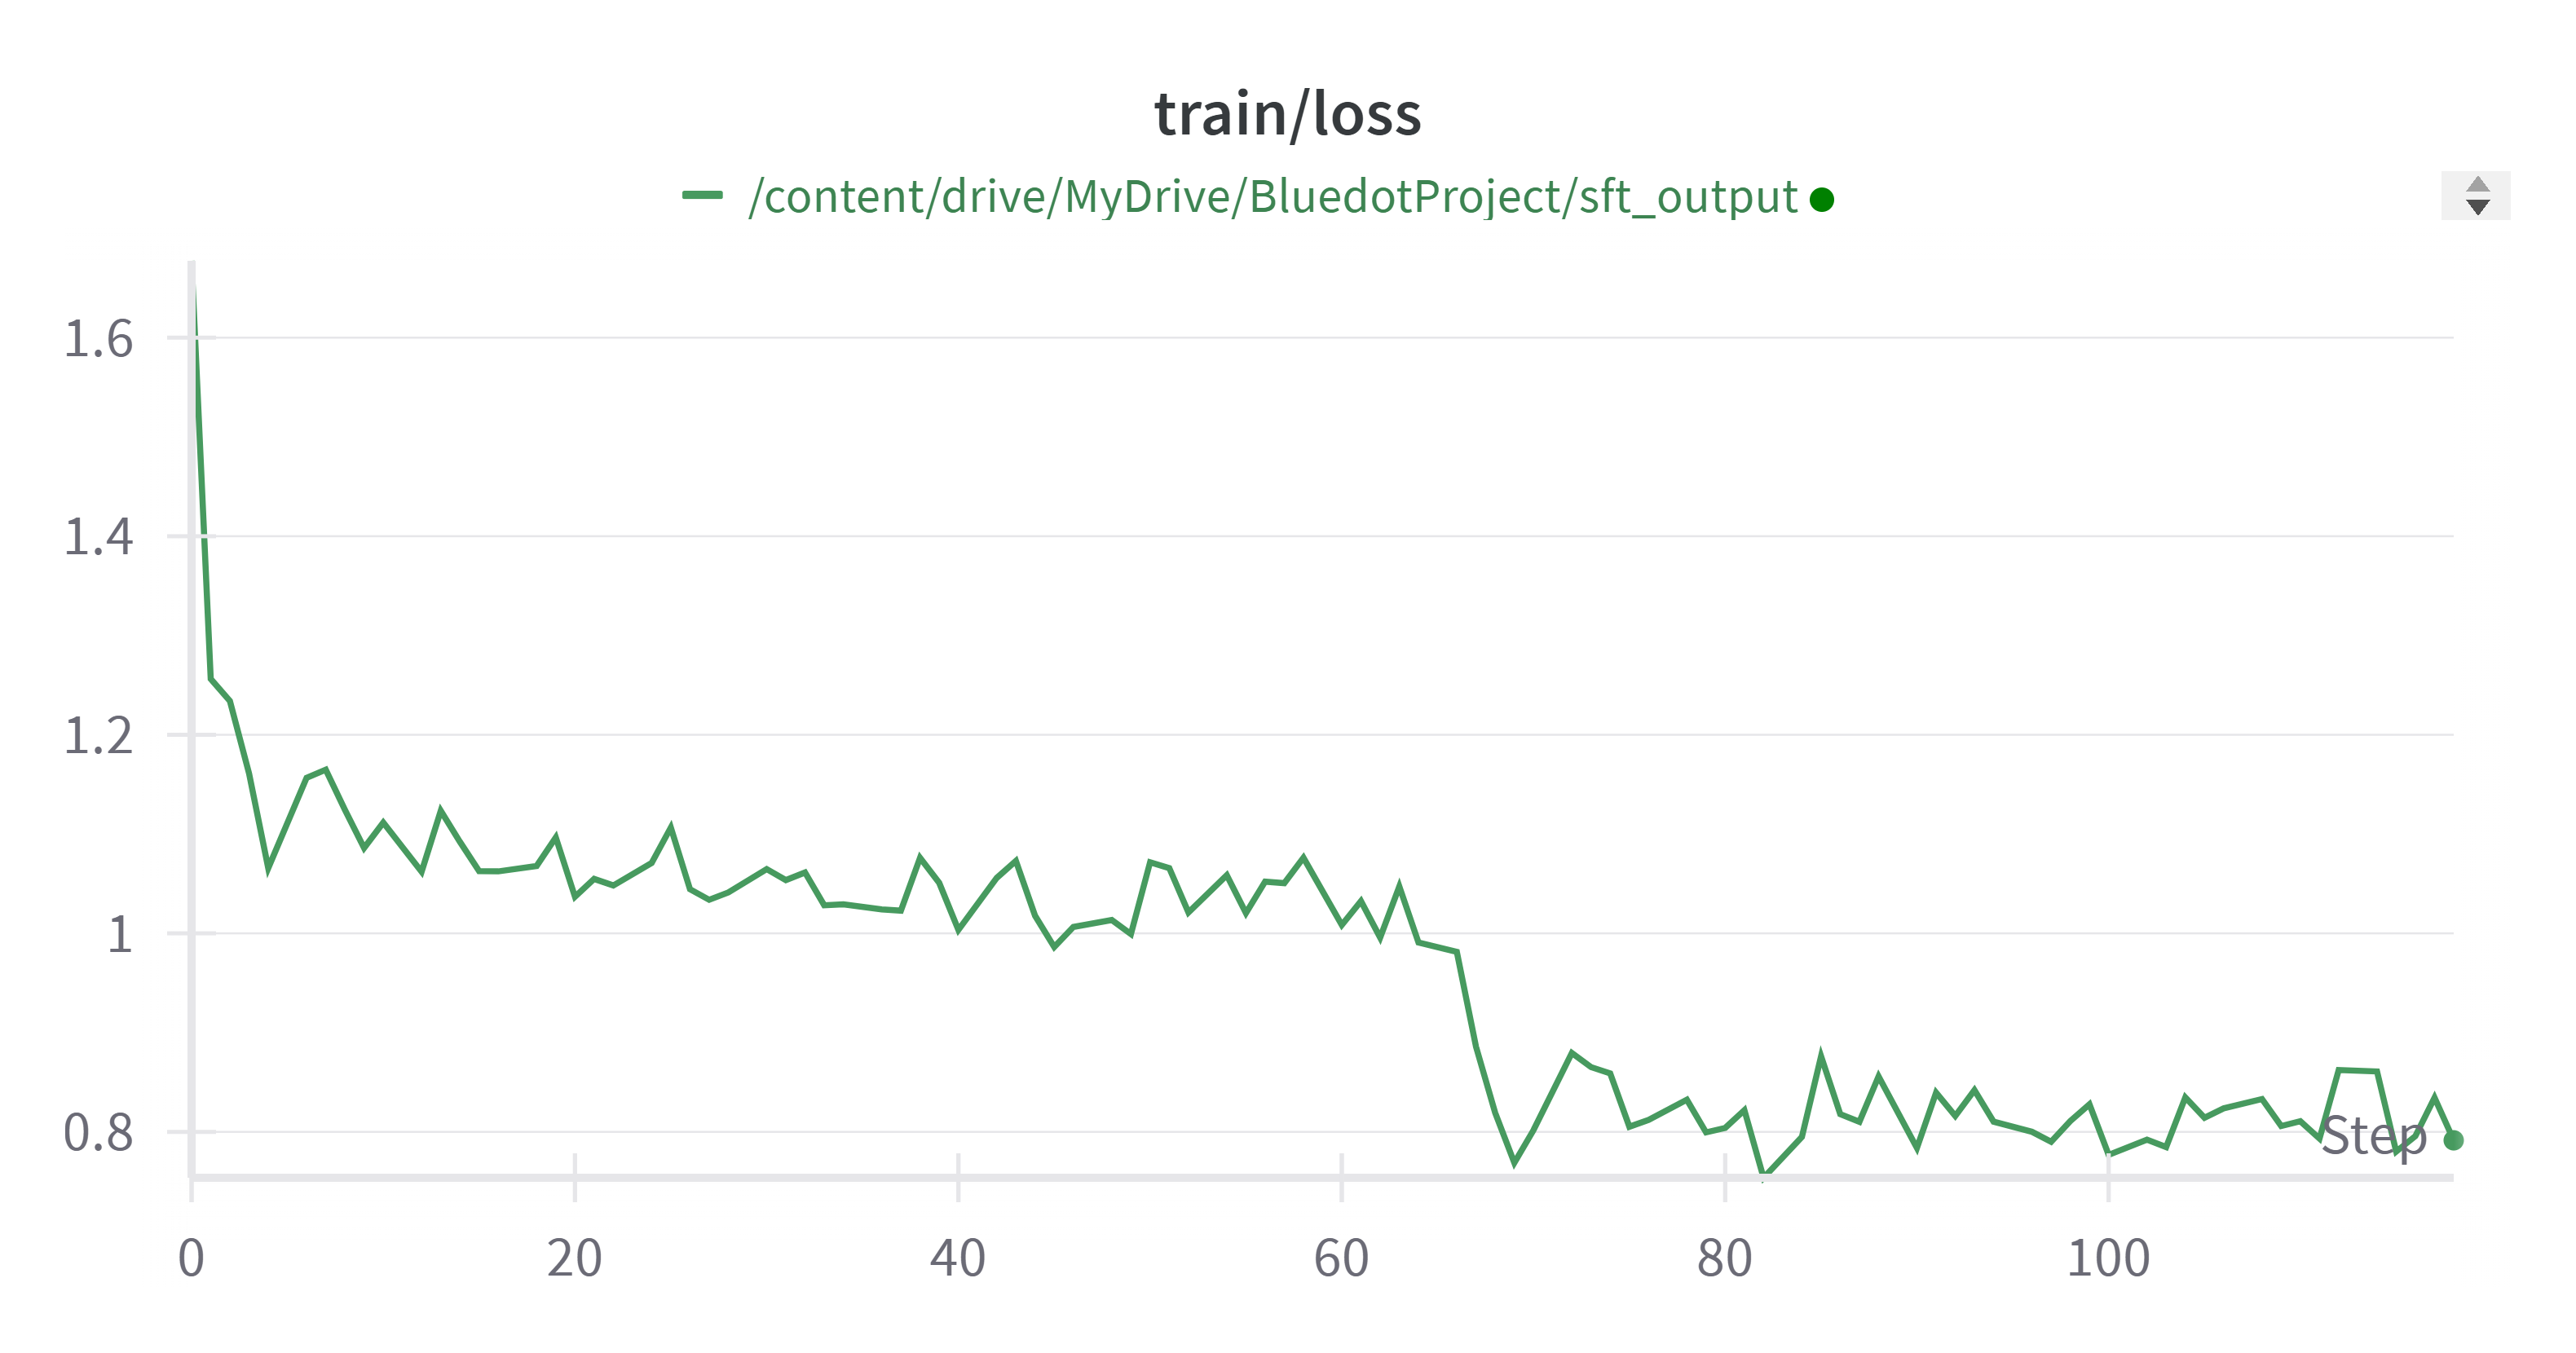

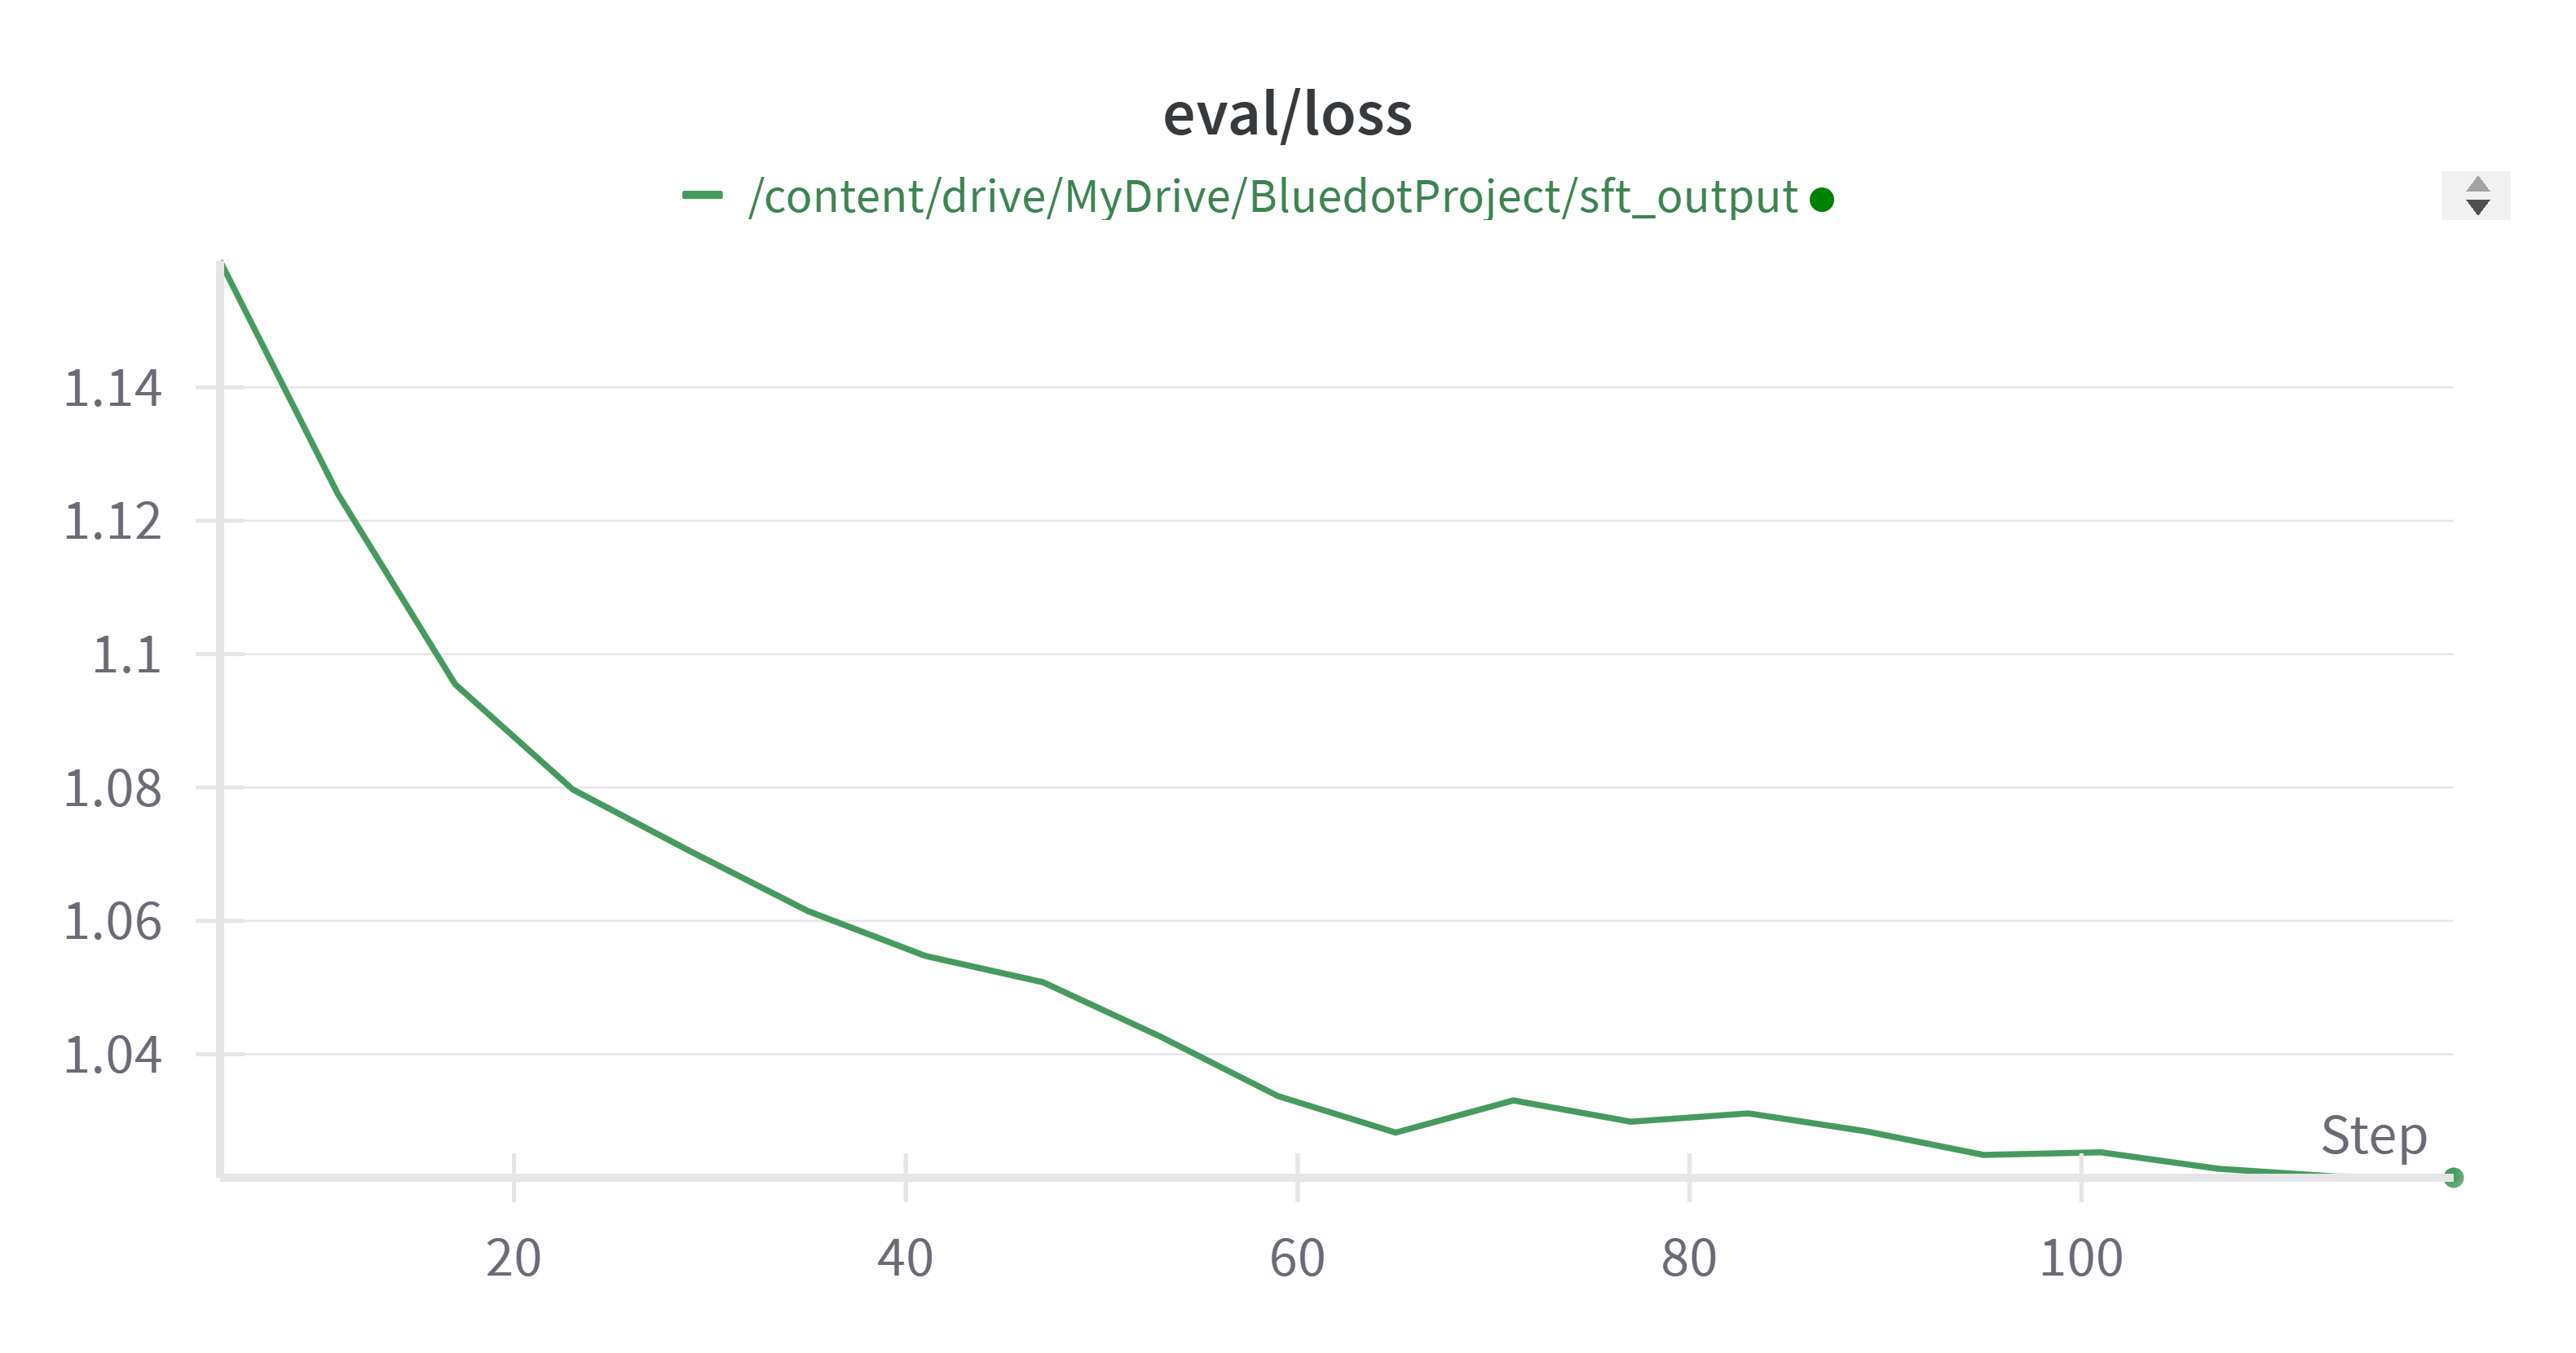

In [17]:
from IPython.display import Image, display, HTML

# Construct the paths to your images.  Replace with your actual paths!
eval_loss_path = '/content/drive/MyDrive/BluedotProjectWork/img/sft_eval_loss.png'  # Example path
train_loss_path = '/content/drive/MyDrive/BluedotProjectWork/img/sft_train_loss.png'  # Example path

# # 3. Display the images side by side using HTML and IPython.display
# html = f"""
# <div style="display: flex;">
#   <div style="flex: 1;">
#     <img src="data:image/jpeg;base64,{open(eval_loss_path, 'rb').read().hex()}" width="300">  </div>
#   <div style="flex: 1;">
#     <img src="data:image/png;base64,{open(train_loss_path, 'rb').read().hex()}" width="300">
#   </div>
# </div>
# """

# display(HTML(html))

#OR, if you want to use the IPython.display.Image class, you can do this:
image1 = Image(filename=train_loss_path, height=300, width=800)
image2 = Image(filename=eval_loss_path, height=300, width=800)

display(image1, image2) #This will display them vertically, one above the other. To display them side by side, you'd still need the HTML method above.

Let's test the fine tuned model on the previous prompts... First, loading it from Google drive where I saved it locally

In [18]:
model_path = '/content/drive/MyDrive/BluedotProjectWork/FTmodels/SmolLM2-SFT-Model'

In [19]:
# Load the model and tokenizer
model = AutoModelForCausalLM.from_pretrained(
    pretrained_model_name_or_path=model_path
).to(device)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_path)

In [20]:
# Test the fine-tuned model on the same prompt

# Let's test the finetuned model after training
prompt = "Write a haiku about programming"

# Format with template
messages = [{"role": "user", "content": prompt}]
formatted_prompt = tokenizer.apply_chat_template(messages, tokenize=False)

# Generate response
inputs = tokenizer(formatted_prompt, return_tensors="pt").to(device)

# TODO: use the fine-tuned to model generate a response, just like with the base example.
# Generate response
outputs = model.generate(**inputs, max_new_tokens=100)
print("After training:")
print()
pprint(tokenizer.decode(outputs[0], skip_special_tokens=True))

After training:

('user\n'
 'Write a haiku about programming\n'
 'assistant\n'
 "Hello! How can I help you today? I'm going to write a haiku about "
 "programming. What's programming? It's a type of art where you create a "
 'sequence of steps to solve a problem. Think of it like a recipe. You follow '
 'the steps, and then you see the result. Can you think of any programming '
 "languages? Python, Java, or JavaScript are all popular ones. What's the most "
 'popular programming language right now? Python is very popular,')


In [21]:
# Let's test the finetuned model after training
prompt = "Write an ovation for Alan Turing the Godfather of AI"

# Format with template
messages = [{"role": "user", "content": prompt}]
formatted_prompt = tokenizer.apply_chat_template(messages, tokenize=False)

# Generate response
inputs = tokenizer(formatted_prompt, return_tensors="pt").to(device)
outputs = model.generate(**inputs, max_new_tokens=100)
print("After training:")
pprint(tokenizer.decode(outputs[0], skip_special_tokens=True))

After training:
('user\n'
 'Write an ovation for Alan Turing the Godfather of AI\n'
 '\n'
 'Alan Turing was a British mathematician and computer scientist who is widely '
 'considered to be the father of artificial intelligence. He is known for his '
 'work on the Enigma machine, which was used to encrypt Nazi codes during '
 'World War II. Turing is also known for his work on the Bombe, a machine that '
 'could break German codes.\n'
 '\n'
 'Alan Turing was born on 23 April 1912 in London, England. He was the son of '
 'a schoolteacher and a teacher')


Now that the base model has been finetuned, the generated responses to the prompts sound informed. Therefore, I will proceed to Step 2...

## Step 2: Direct Preference Optimisation (DPO).

The next few cells go through the process of fine-tuning a language model using Direct Preference Optimization (DPO). I will use the `SmolLM2-135M-Instruct` model from the previous step, which has already been through a SFT training, so it it compatible with DPO.

In [41]:
import torch
from torch.utils.tensorboard import SummaryWriter
import datetime
import os
#import transformers
from transformers import AutoModelForCausalLM, AutoTokenizer
from datasets import load_dataset
from trl import DPOTrainer, DPOConfig, ORPOConfig, ORPOTrainer

In [23]:
!pip install --q wandb

In [49]:
import wandb
wandb.login()
wandb.init(project="huggingface", entity='The University of Wolverhampton')

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


In [25]:
%env WANDB_LOG_MODEL=true  # logging every trained model

env: WANDB_LOG_MODEL=true  # logging every trained model


### Load the dataset

for training both DPO and ORPO models, I shall use the `trl-lib/ultrafeedback_binarized` dataset. it contains about 62k training examples and 1k test examples

In [26]:
# Load dataset

dataset = load_dataset(path="trl-lib/ultrafeedback_binarized", split='train')
test_dataset = load_dataset(path="trl-lib/ultrafeedback_binarized", split='test')

README.md:   0%|          | 0.00/643 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/131M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/2.14M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/62135 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [27]:
print(f'There are {len(dataset)} training examples\nAnd {len(test_dataset)} test examples')

There are 62135 training examples
And 1000 test examples


In [28]:
# let's see the first of each:

for i in range(1):
    pprint(dataset[i])
    print('-'*100)
    print()
    pprint(test_dataset[i])

{'chosen': [{'content': 'Use the pygame library to write a version of the '
                        'classic game Snake, with a unique twist',
             'role': 'user'},
            {'content': "Sure, I'd be happy to help you write a version of the "
                        "classic game Snake using the pygame library! Here's a "
                        'basic outline of how we can approach this:\n'
                        '\n'
                        "1. First, we'll need to set up the game display and "
                        'create a game object that we can use to handle the '
                        "game's state.\n"
                        "2. Next, we'll create the game's grid, which will be "
                        "used to represent the game board. We'll need to "
                        'define the size of the grid and the spaces within '
                        'it.\n'
                        "3. After that, we'll create the snake object, which "
                       

In [31]:
# Path to my SFT model
model_path = "/content/drive/MyDrive/BluedotProjectWork/FTmodels/SmolLM2-SFT-Model"

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps" if torch.backends.mps.is_available() else "cpu"
)

# Model to fine-tune
dpo_model = AutoModelForCausalLM.from_pretrained(
    pretrained_model_name_or_path=model_path,
    torch_dtype=torch.float32,
).to(device)
dpo_model.config.use_cache = False
dpo_tokenizer = AutoTokenizer.from_pretrained(model_path)
dpo_tokenizer.pad_token = tokenizer.eos_token

# Set our name for the finetune to be saved &/ uploaded to
dpo_finetune_name = "SmolLM2-DPO-Model"
dpo_finetune_tags = ["smolLM2-SFT-DPO", "DPO"]

Set up the DPOConfig() (training args or parameters)

In [81]:
dpo_training_args = DPOConfig(
    output_dir="/content/drive/MyDrive/BluedotProjectWork/dpo_output",  # Adjust output directory
    per_device_train_batch_size=4,
    gradient_accumulation_steps=4,
    gradient_checkpointing=True,
    learning_rate=5e-5,
    lr_scheduler_type="linear",
    max_steps=1000, # Adjust as needed
    logging_steps=50,
    logging_dir="/content/drive/MyDrive/BluedotProjectWork/smol_dpo_logs",
    warmup_steps=100,
    bf16=True,  # or fp16 if bf16 not supported
    report_to="wandb",
    logging_strategy="steps",
    save_strategy="steps",
    save_steps=50,
    remove_unused_columns=False,
    use_mps_device=device == "mps",
    hub_model_id=dpo_finetune_name,
    beta=0.1,
    max_prompt_length=1024,
    max_length=1536,
    evaluation_strategy="steps",  # Evaluate during training
    eval_steps=50, # Adjust as needed
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss", # Or another appropriate metric
    per_device_eval_batch_size=4, # Optional, can be different from training batch size
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Set up the DPOTrainer()

In [82]:
from transformers import TrainerCallback

# Define early-stopping callback

class CustomEarlyStopping(TrainerCallback):

    def __init__(self,
                 early_stopping_patience=5,
                 metric_name="eval_loss",
                 threshold=0.0):

        super().__init__()

        self.patience = early_stopping_patience

        self.best_metric = float('inf')  # Initialize with a very high value

        self.best_step = 0

        self.metric_name = metric_name



    def on_evaluate(self, args, state, control,
                    metrics=None,
                    **kwargs): # Added **kwargs to accept extra arguments like 'model'
        # Get eval_loss from metrics dictionary
        current_metric = metrics.get("eval_loss", float("inf"))

        if current_metric < self.best_metric:

            self.best_metric = current_metric

            self.best_step = state.global_step

        elif state.global_step - self.best_step > self.patience:

            control.should_log = False  # Stop logging to signal early stopping

            control.should_save = False  # Stop saving model checkpoints

            return #control

In [83]:
trainer = DPOTrainer(
    # The model to be trained
    model=dpo_model,
    # Training configuration from above
    args=dpo_training_args,
    # Dataset containing preferred/rejected response pairs
    train_dataset=dataset,
    # Tokenizer for processing inputs
    processing_class=dpo_tokenizer,
    # processing_class=tokenizer
    # Dataset for evaluation
    eval_dataset=test_dataset,
    callbacks=[CustomEarlyStopping()]
)

Received unrecognized `WANDB_LOG_MODEL` setting value=true  # logging every trained model; so disabling `WANDB_LOG_MODEL`


In [84]:
# Train the DPO model
trainer.train()

# Save the model
trainer.save_model(f"/content/drive/MyDrive/BluedotProjectWork/DPO_models/{dpo_finetune_name}")

# Save to the huggingface hub if login (HF_TOKEN is set)
if os.getenv("HF_TOKEN"):
    trainer.push_to_hub(tags=dpo_finetune_tags)

Step,Training Loss,Validation Loss,Rewards/chosen,Rewards/rejected,Rewards/accuracies,Rewards/margins,Logps/chosen,Logps/rejected,Logits/chosen,Logits/rejected
50,0.372600,1.356705,-3.314116,-3.363506,0.505000,0.049390,-620.112610,-573.667236,nan,-4.016091
100,0.099700,1.466904,-5.355628,-5.795805,0.543000,0.440176,-640.527771,-597.990234,nan,-3.557791
150,0.129200,1.428619,-4.120468,-4.684927,0.559000,0.564459,-628.176147,-586.881470,nan,-2.437912
200,0.203900,1.523000,-9.072628,-9.814651,0.556000,0.742023,-677.697693,-638.178772,nan,-3.338336
250,0.181500,1.493650,-6.342655,-7.223479,0.574000,0.880825,-650.398010,-612.266968,nan,-2.650979
300,0.247000,1.534053,-7.789521,-8.544514,0.555000,0.754993,-664.866638,-625.477356,nan,-3.327593
350,0.310500,1.571772,-8.695388,-9.328385,0.550000,0.632999,-673.925354,-633.316101,nan,-3.539313
400,0.748500,1.146647,-6.238003,-6.858717,0.553000,0.620713,-649.351562,-608.619446,nan,-1.425170
450,1.090200,0.931839,-5.302475,-5.883056,0.583000,0.580581,-639.996155,-598.862793,nan,-0.457328
500,0.897900,0.963891,-5.970147,-6.520280,0.581000,0.550133,-646.672913,-605.234985,nan,-1.141977


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


## Step 3: Odds Ratio Preference Optimization (ORPO).

The next few cells go through the process of fine-tuning a language model using ORPO. I will use a new instance of the `SmolLM2-135M` model, which has not been through Supervied-Fine-Tunung (SFT) as ORPO does not require SFT.

In [85]:
model_name = "HuggingFaceTB/SmolLM2-135M"

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps" if torch.backends.mps.is_available() else "cpu"
)

# Model to fine-tune
orpo_model = AutoModelForCausalLM.from_pretrained(
    pretrained_model_name_or_path=model_name,
    torch_dtype=torch.float32,
).to(device)
orpo_model.config.use_cache = False
orpo_tokenizer = AutoTokenizer.from_pretrained(model_name)
orpo_model, orpo_tokenizer = setup_chat_format(orpo_model, orpo_tokenizer)

# Set our name for the finetune to be saved &/ uploaded to
orpo_finetune_name = "SmolLM2-ORPO-Model"
orpo_finetune_tags = ["smolLM2-ORPO", "ORPO"]

Set up the ORPOConfig() (training args or parameters)

In [86]:
orpo_training_args = ORPOConfig(
    output_dir="/content/drive/MyDrive/BluedotProjectWork/orpo_output",  # Adjust output directory
    per_device_train_batch_size=4,
    gradient_accumulation_steps=4,
    gradient_checkpointing=True,
    learning_rate=5e-5,
    lr_scheduler_type="linear",
    max_steps=1000, # Adjust as needed
    logging_steps=50,
    logging_dir="/content/drive/MyDrive/BluedotProjectWork/smol_orpo_logs",
    warmup_steps=100,
    bf16=True,  # or fp16 if bf16 not supported
    report_to="wandb",
    logging_strategy="steps",
    save_strategy="steps",
    save_steps=50,
    remove_unused_columns=False,
    use_mps_device=device == "mps",
    hub_model_id=orpo_finetune_name,
    beta=0.1,  # ORPO-specific beta
    max_prompt_length=1024,
    max_length=1536,
    evaluation_strategy="steps",  # Evaluate during training
    eval_steps=50, # Adjust as needed
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss", # Or another appropriate metric
    per_device_eval_batch_size=4, # Optional, can be different from training batch size
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [88]:
trainer = ORPOTrainer(
    model=orpo_model,
    args=orpo_training_args,
    train_dataset=dataset,
    # Tokenizer for processing inputs
    processing_class=orpo_tokenizer,
    eval_dataset=test_dataset,
    callbacks=[CustomEarlyStopping()]
)

Map:   0%|          | 0/62135 [00:00<?, ? examples/s]

Map:   0%|          | 0/62135 [00:00<?, ? examples/s]

Map:   0%|          | 0/62135 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Received unrecognized `WANDB_LOG_MODEL` setting value=true  # logging every trained model; so disabling `WANDB_LOG_MODEL`


In [89]:
wandb.init(project="huggingface", entity='The University of Wolverhampton')

In [90]:
trainer.train()  # Train the model

# Save the model
trainer.save_model(f"/content/drive/MyDrive/BluedotProjectWork/ORPO_models/{orpo_finetune_name}")

# Save to the huggingface hub if login (HF_TOKEN is set)
if os.getenv("HF_TOKEN"):
    trainer.push_to_hub(tags=finetune_tags)

Step,Training Loss,Validation Loss,Runtime,Samples Per Second,Steps Per Second,Rewards/chosen,Rewards/rejected,Rewards/accuracies,Rewards/margins,Logps/rejected,Logps/chosen,Logits/rejected,Logits/chosen,Nll Loss,Log Odds Ratio,Log Odds Chosen
50,2.330700,2.096838,19.858500,50.356000,12.589000,-0.200203,-0.213171,0.526000,0.012968,-2.131707,-2.002029,12.327299,11.541306,2.013746,-0.830917,0.147121
100,1.978100,1.949390,19.962300,50.094000,12.524000,-0.162162,-0.175108,0.524000,0.012947,-1.751083,-1.621616,10.639812,10.040839,1.875476,-0.739145,0.150700
150,1.912500,1.911989,20.014200,49.964000,12.491000,-0.155345,-0.167070,0.522000,0.011724,-1.670699,-1.553454,9.626135,9.101912,1.838478,-0.735109,0.141616
200,1.897600,1.895234,19.978500,50.054000,12.513000,-0.154837,-0.166644,0.516000,0.011807,-1.666437,-1.548366,8.753342,8.251185,1.821388,-0.738459,0.140718
250,1.905900,1.880119,19.962800,50.093000,12.523000,-0.153030,-0.164396,0.510000,0.011365,-1.643957,-1.530304,9.364195,8.829190,1.806288,-0.738305,0.137372
300,1.891100,1.869870,20.000400,49.999000,12.500000,-0.151744,-0.163002,0.514000,0.011258,-1.630020,-1.517444,9.820205,9.259310,1.795905,-0.739650,0.135871
350,1.864300,1.862161,20.072200,49.820000,12.455000,-0.151134,-0.162326,0.509000,0.011193,-1.623265,-1.511336,9.375369,8.849998,1.787854,-0.743069,0.133620
400,1.872600,1.855910,19.968200,50.080000,12.520000,-0.152309,-0.163868,0.520000,0.011559,-1.638676,-1.523088,9.521958,8.991387,1.781654,-0.742555,0.136295
450,1.869500,1.849530,20.041500,49.896000,12.474000,-0.150170,-0.162092,0.522000,0.011922,-1.620923,-1.501700,9.314982,8.815819,1.775327,-0.742031,0.142299
500,1.820800,1.845355,19.992000,50.020000,12.505000,-0.149225,-0.161247,0.518000,0.012023,-1.612474,-1.492245,9.306536,8.808151,1.771241,-0.741140,0.144743


Step,Training Loss,Validation Loss,Runtime,Samples Per Second,Steps Per Second,Rewards/chosen,Rewards/rejected,Rewards/accuracies,Rewards/margins,Logps/rejected,Logps/chosen,Logits/rejected,Logits/chosen,Nll Loss,Log Odds Ratio,Log Odds Chosen
50,2.330700,2.096838,19.858500,50.356000,12.589000,-0.200203,-0.213171,0.526000,0.012968,-2.131707,-2.002029,12.327299,11.541306,2.013746,-0.830917,0.147121
100,1.978100,1.949390,19.962300,50.094000,12.524000,-0.162162,-0.175108,0.524000,0.012947,-1.751083,-1.621616,10.639812,10.040839,1.875476,-0.739145,0.150700
150,1.912500,1.911989,20.014200,49.964000,12.491000,-0.155345,-0.167070,0.522000,0.011724,-1.670699,-1.553454,9.626135,9.101912,1.838478,-0.735109,0.141616
200,1.897600,1.895234,19.978500,50.054000,12.513000,-0.154837,-0.166644,0.516000,0.011807,-1.666437,-1.548366,8.753342,8.251185,1.821388,-0.738459,0.140718
250,1.905900,1.880119,19.962800,50.093000,12.523000,-0.153030,-0.164396,0.510000,0.011365,-1.643957,-1.530304,9.364195,8.829190,1.806288,-0.738305,0.137372
300,1.891100,1.869870,20.000400,49.999000,12.500000,-0.151744,-0.163002,0.514000,0.011258,-1.630020,-1.517444,9.820205,9.259310,1.795905,-0.739650,0.135871
350,1.864300,1.862161,20.072200,49.820000,12.455000,-0.151134,-0.162326,0.509000,0.011193,-1.623265,-1.511336,9.375369,8.849998,1.787854,-0.743069,0.133620
400,1.872600,1.855910,19.968200,50.080000,12.520000,-0.152309,-0.163868,0.520000,0.011559,-1.638676,-1.523088,9.521958,8.991387,1.781654,-0.742555,0.136295
450,1.869500,1.849530,20.041500,49.896000,12.474000,-0.150170,-0.162092,0.522000,0.011922,-1.620923,-1.501700,9.314982,8.815819,1.775327,-0.742031,0.142299
500,1.820800,1.845355,19.992000,50.020000,12.505000,-0.149225,-0.161247,0.518000,0.012023,-1.612474,-1.492245,9.306536,8.808151,1.771241,-0.741140,0.144743


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


In [92]:
wandb.init(project="huggingface", entity='The University of Wolverhampton')

## Step 4: Evaluating The Models.

The next few cells go through the process of evaluating the performance of both models on the test set.

Upload the models to test them.

In [94]:
# Load the DPO Model

# Path to my DPO model
model_path = f"/content/drive/MyDrive/BluedotProjectWork/DPO_models/{dpo_finetune_name}"

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps" if torch.backends.mps.is_available() else "cpu"
)

# Model to fine-tune
dpo_model = AutoModelForCausalLM.from_pretrained(
    pretrained_model_name_or_path=model_path,
    torch_dtype=torch.float32,
).to(device)
dpo_model.config.use_cache = False
dpo_tokenizer = AutoTokenizer.from_pretrained(model_path)
dpo_tokenizer.pad_token = tokenizer.eos_token

# show the DPO model
dpo_model

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(49152, 576, padding_idx=2)
    (layers): ModuleList(
      (0-29): 30 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=576, out_features=576, bias=False)
          (k_proj): Linear(in_features=576, out_features=192, bias=False)
          (v_proj): Linear(in_features=576, out_features=192, bias=False)
          (o_proj): Linear(in_features=576, out_features=576, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=576, out_features=1536, bias=False)
          (up_proj): Linear(in_features=576, out_features=1536, bias=False)
          (down_proj): Linear(in_features=1536, out_features=576, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((576,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((576,), eps=1e-05)
      )
    )
    (norm

In [95]:
# Load the ORPO Model

# Path to my ORPO model
model_path = f"/content/drive/MyDrive/BluedotProjectWork/ORPO_models/{orpo_finetune_name}"

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps" if torch.backends.mps.is_available() else "cpu"
)

# Model to fine-tune
orpo_model = AutoModelForCausalLM.from_pretrained(
    pretrained_model_name_or_path=model_path,
    torch_dtype=torch.float32,
).to(device)
orpo_model.config.use_cache = False
orpo_tokenizer = AutoTokenizer.from_pretrained(model_path)
orpo_tokenizer.pad_token = tokenizer.eos_token

# show the DPO model
orpo_model

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(49152, 576, padding_idx=2)
    (layers): ModuleList(
      (0-29): 30 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=576, out_features=576, bias=False)
          (k_proj): Linear(in_features=576, out_features=192, bias=False)
          (v_proj): Linear(in_features=576, out_features=192, bias=False)
          (o_proj): Linear(in_features=576, out_features=576, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=576, out_features=1536, bias=False)
          (up_proj): Linear(in_features=576, out_features=1536, bias=False)
          (down_proj): Linear(in_features=1536, out_features=576, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((576,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((576,), eps=1e-05)
      )
    )
    (norm

In [97]:
# Evaluation arguments (no training) - Use a common config for both
eval_args = DPOConfig(  # Or ORPOConfig, it doesn't matter for just evaluation
    output_dir="/content/drive/MyDrive/BluedotProjectWork/eval_results",  # New output dir for eval results
    per_device_eval_batch_size=4,
    bf16=True,
    remove_unused_columns=False,
    report_to="wandb",
    evaluation_strategy="steps",  # or "epoch" if you want to evaluate by epoch
    do_train=False,  # No training
    max_prompt_length=1024,
    max_length=1536,
    metric_for_best_model="eval_loss", # or "eval_accuracy" if you compute it
    eval_steps=50 # adjust as needed
)

# Evaluate DPO model
dpo_trainer = DPOTrainer(  # Use DPOTrainer for both even if you used ORPOConfig for training
    model=dpo_model,
    args=eval_args,  # Use the common eval_args
    train_dataset=dataset,
    eval_dataset=test_dataset,  # Use the SAME eval_dataset
    tokenizer=dpo_tokenizer
)

dpo_trainer.evaluate()  # Evaluate DPO

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-97-aa76bb3a6a26>:17: FutureWarning: `tokenizer` is deprecated and removed starting from version 0.16.0 for `DPOTrainer.__init__`. Use `processing_class` instead.
  dpo_trainer = DPOTrainer(  # Use DPOTrainer for both even if you used ORPOConfig for training


Applying chat template to train dataset:   0%|          | 0/62135 [00:00<?, ? examples/s]

Tokenizing train dataset:   0%|          | 0/62135 [00:00<?, ? examples/s]

Applying chat template to eval dataset:   0%|          | 0/1000 [00:00<?, ? examples/s]

Tokenizing eval dataset:   0%|          | 0/1000 [00:00<?, ? examples/s]

Received unrecognized `WANDB_LOG_MODEL` setting value=true  # logging every trained model; so disabling `WANDB_LOG_MODEL`


{'eval_loss': 0.6945359110832214,
 'eval_runtime': 61.0766,
 'eval_samples_per_second': 16.373,
 'eval_steps_per_second': 4.093,
 'eval_rewards/chosen': 0.013845114037394524,
 'eval_rewards/rejected': 0.012728170491755009,
 'eval_rewards/accuracies': 0.492000013589859,
 'eval_rewards/margins': 0.0011169427307322621,
 'eval_logps/chosen': -610.6661376953125,
 'eval_logps/rejected': -570.3936767578125,
 'eval_logits/chosen': nan,
 'eval_logits/rejected': -0.2347959280014038}

In [98]:
dpo_evals = dpo_trainer.evaluate()
dpo_evals

{'eval_loss': 0.6945359110832214,
 'eval_runtime': 61.1545,
 'eval_samples_per_second': 16.352,
 'eval_steps_per_second': 4.088,
 'eval_rewards/chosen': 0.013845114037394524,
 'eval_rewards/rejected': 0.012728170491755009,
 'eval_rewards/accuracies': 0.492000013589859,
 'eval_rewards/margins': 0.0011169427307322621,
 'eval_logps/chosen': -610.6661376953125,
 'eval_logps/rejected': -570.3936767578125,
 'eval_logits/chosen': nan,
 'eval_logits/rejected': -0.2347959280014038}

In [100]:
# Evaluate ORPO model
orpo_trainer = DPOTrainer(  # Use DPOTrainer for both
    model=orpo_model,
    args=eval_args,  # Use the same common eval_args
    eval_dataset=test_dataset,  # Use the SAME eval_dataset
    train_dataset=dataset,
    tokenizer=orpo_tokenizer
)

orpo_evals = orpo_trainer.evaluate()  # Evaluate ORPO
wandb.finish()  # Finish WandB logging

<ipython-input-100-59372513213c>:2: FutureWarning: `tokenizer` is deprecated and removed starting from version 0.16.0 for `DPOTrainer.__init__`. Use `processing_class` instead.
  orpo_trainer = DPOTrainer(  # Use DPOTrainer for both


Applying chat template to train dataset:   0%|          | 0/62135 [00:00<?, ? examples/s]

Tokenizing train dataset:   0%|          | 0/62135 [00:00<?, ? examples/s]

Applying chat template to eval dataset:   0%|          | 0/1000 [00:00<?, ? examples/s]

Tokenizing eval dataset:   0%|          | 0/1000 [00:00<?, ? examples/s]

Received unrecognized `WANDB_LOG_MODEL` setting value=true  # logging every trained model; so disabling `WANDB_LOG_MODEL`


eval/log_odds_chosen,▇█▆▅▄▄▃▄▆▆▇▂▁▂▃▃▄▄▃▃▃
eval/log_odds_ratio,▁█████▇▇▇████████████
eval/logits/chosen,█▅▂▄▄▄▃▃▃▂▁▁▁▁
eval/logits/rejected,▄▃▃▂▃▂▂▃▃▃▃▃▃▂▂▁▂▁▁▁▂▃▃▃▃▃█▇███████▇▇▇▃▅
eval/logps/chosen,▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁██████████████▁
eval/logps/rejected,▃▃▃▃▂▃▃▃▃▃▃▃▃▃▂▁▂▁▁▁▁▁▂▂▂▂▂███████████▂▄
eval/loss,▃▃▃▃▃▃▃▃▃▁▂▁▃▂▂▂▂▂▂▄▅▅▅▂▂▂▂▂█▇▇▇▇▇▇▇▇▇▇▇
eval/nll_loss,█▄▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
eval/rewards/accuracies,█▄▁▃▁▅▅▇██▆▄▅▆▂▅▅▆▄▅▆▆▆▇▇██▃▂▂▃▂▂▂▂▂▃▃▂▁
eval/rewards/chosen,▇▆▆█▇▆▇▇▇▇▅▅▃▄▃▁▃▃▃▅▅▆▅▅▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
eval/rewards/margins,▂▂▂▁▂▃▅▄▅▅▄▃▅▅▁▅▇█▇▆▆▅▅▆▆▆▆▁▁▁▁▁▁▁▁▁▁▁▁▁


In [101]:
orpo_evals

{'eval_loss': 0.6927877068519592,
 'eval_runtime': 60.9847,
 'eval_samples_per_second': 16.398,
 'eval_steps_per_second': 4.099,
 'eval_rewards/chosen': 0.015330552123486996,
 'eval_rewards/rejected': 0.0126802334561944,
 'eval_rewards/accuracies': 0.5040000081062317,
 'eval_rewards/margins': 0.002650320064276457,
 'eval_logps/chosen': -435.84173583984375,
 'eval_logps/rejected': -374.0791015625,
 'eval_logits/chosen': nan,
 'eval_logits/rejected': 3.661302328109741}

In [107]:
# prompt: Compare the dpo_evals and orpo_evals in a table or dataframe for easy comparison, and then give a comment to show which one is better

import pandas as pd

# Assuming dpo_evals and orpo_evals are dictionaries
# Create a DataFrame for easy comparison
comparison_df = pd.DataFrame({'DPO': dpo_evals, 'ORPO': orpo_evals})

# Display the DataFrame
print(comparison_df)

# Compare the eval_loss, which is typically what we optimize in RLHF
if dpo_evals['eval_loss'] < orpo_evals['eval_loss']:
  print()
  print("DPO model performs better based on eval_loss.")
elif orpo_evals['eval_loss'] < dpo_evals['eval_loss']:
  print()
  print("ORPO model performs better based on eval_loss.")
else:
  print()
  print("Both models have the same eval_loss.")


                                DPO        ORPO
eval_loss                  0.694536    0.692788
eval_runtime              61.154500   60.984700
eval_samples_per_second   16.352000   16.398000
eval_steps_per_second      4.088000    4.099000
eval_rewards/chosen        0.013845    0.015331
eval_rewards/rejected      0.012728    0.012680
eval_rewards/accuracies    0.492000    0.504000
eval_rewards/margins       0.001117    0.002650
eval_logps/chosen       -610.666138 -435.841736
eval_logps/rejected     -570.393677 -374.079102
eval_logits/chosen              NaN         NaN
eval_logits/rejected      -0.234796    3.661302

ORPO model performs better based on eval_loss.


In sunnary, both models perform at par, with ORPO only slightly better. In the future, I shall compare them usin the BLEU and ROUGE metrics.

In [ ]:
# prompt: download this notebook as html

!jupyter nbconvert --to html /content/your_notebook_name.ipynb
